In [ ]:
import re
from typing import Dict, List, Optional, Text, Tuple
import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path_to_arrays = "/content/drive/MyDrive/mit/cv_project/data/preprocessed/clipped_phy_stats" # create a shortcut from my files to your drive and put the path here
path_train = os.path.join(path_to_arrays, "train_features.npy")
path_train_labels = os.path.join(path_to_arrays, "train_labels.npy")
train_features = np.load(path_train)
train_labels = np.load(path_train_labels)

path_val = os.path.join(path_to_arrays, "val_features.npy")
path_val_labels = os.path.join(path_to_arrays, "val_labels.npy")
val_features = np.load(path_val)
val_labels = np.load(path_val_labels)

path_test = os.path.join(path_to_arrays, "test_features.npy")
path_test_labels = os.path.join(path_to_arrays, "test_labels.npy")
test_features = np.load(path_test)
test_labels = np.load(path_test_labels)

In [ ]:
train_features

In [ ]:
vmaxs = train_features.max(axis=(0, 1, 2))
vmins = train_features.min(axis=(0, 1, 2))

In [ ]:
INPUT_FEATURES = ['elevation', 'th_cos', 'th_sin',  'tmmn', 'tmmx', 'sph',
                  'pr', 'pdsi', 'NDVI', 'population', 'erc', 'PrevFireMask']
feat_to_id = {feat:i for i, feat in enumerate(INPUT_FEATURES)}

In [ ]:
TITLES = [
  'Elevation',
  'Wind\nhorizontal',
  'Wind\nvertical',
  'Min temp',
  'Max temp',
  'Humidity',
  'Precipitation',
  'Drought',
  'Vegetation',
  'Population\ndensity',
  'Energy release\ncomponent',
  'Previous\nfire mask',
  'Next\nfire mask'
]
UNITS = ["m", "", "", "m/s", "K", "K", "kg/kg", "mm", "index", "index", "people per km²", "index"]


## Visualize features

### One

<ipython-input-45-0e825dff70ca>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


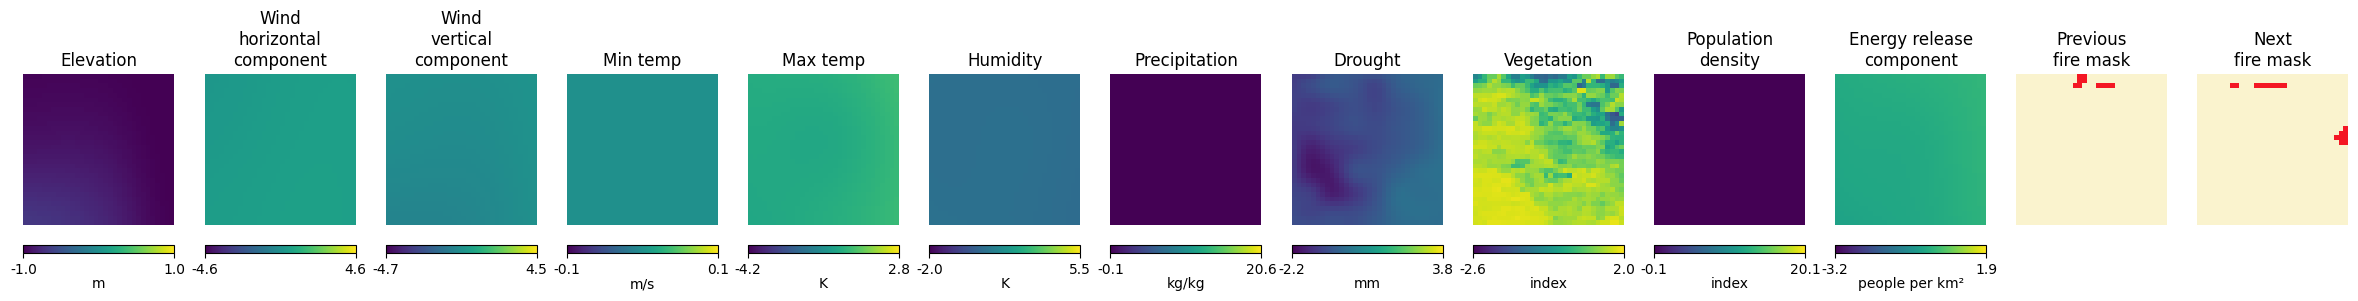

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors, gridspec, ticker

n_features = train_features.shape[-1]
fig = plt.figure(figsize=(30, 6.5))
gs = gridspec.GridSpec(2, n_features + 1, height_ratios=[10, 0.1], hspace=-0.75) #hspace controls space between plot and cbar

CMAP = colors.ListedColormap(["#FAF3CE", '#F41724'])
BOUNDS = [0.001, 1]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)
n_features = train_features.shape[-1]
n_samples = 1

for i in range(n_samples):
    for j in range(n_features + 1):
        ax = fig.add_subplot(gs[0, j])
        if i == 0:
            ax.set_title(TITLES[j], fontsize=12)
        if j < n_features - 1:
            im = ax.imshow(train_features[i, :, :, j], cmap='viridis', vmin=vmins[j], vmax=vmaxs[j])

            cbar_ax = fig.add_subplot(gs[1, j])
            cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
            cbar.set_ticks([im.norm.vmin, im.norm.vmax])
            cbar.set_ticklabels(['{:.1f}'.format(im.norm.vmin), '{:.1f}'.format(im.norm.vmax)])
            cbar.set_label(UNITS[j], labelpad=0, y=-2)

        elif j == n_features - 1:
            im = ax.imshow(train_features[i, :, :, -1], cmap=CMAP, norm=NORM)
        elif j == n_features:
            im = ax.imshow(train_labels[i, :, :, 0], cmap=CMAP, norm=NORM)
        ax.axis('off')
plt.tight_layout()
plt.show()


## Two

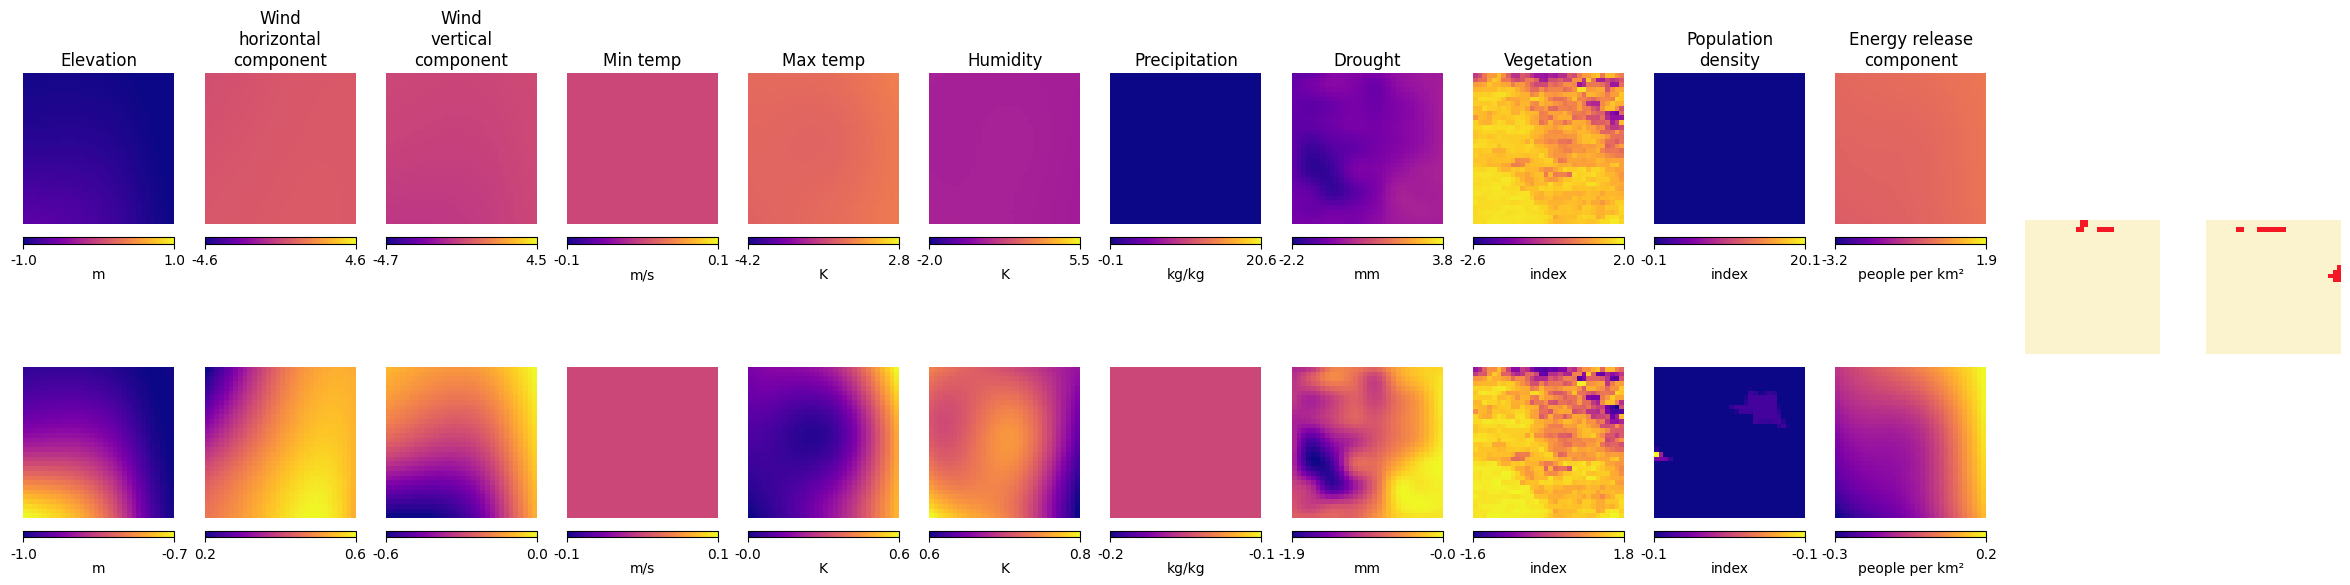

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors, gridspec, ticker

n_features = train_features.shape[-1]
fig = plt.figure(figsize=(30, 6.5))
gs = gridspec.GridSpec(5, n_features + 1, height_ratios=[10, 0.3, 6, 10, 0.3], hspace=-0.2) #hspace controls space between plot and cbar

CMAP = colors.ListedColormap(["#FAF3CE", '#F41724'])
BOUNDS = [0.001, 1]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)
n_features = train_features.shape[-1]

for j in range(n_features + 1):
    if j < n_features - 1:

        ax = fig.add_subplot(gs[0, j])
        ax.set_title(TITLES[j], fontsize=12)
        im = ax.imshow(train_features[i, :, :, j], cmap='plasma', vmin=vmins[j], vmax=vmaxs[j])

        cbar_ax = fig.add_subplot(gs[1, j])
        cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
        cbar.set_ticks([im.norm.vmin, im.norm.vmax])
        cbar.set_ticklabels(['{:.1f}'.format(im.norm.vmin), '{:.1f}'.format(im.norm.vmax)])
        cbar.set_label(UNITS[j], labelpad=0, y=-2)

        ax2 = fig.add_subplot(gs[3, j])
        im2 = ax2.imshow(train_features[i, :, :, j], cmap='plasma')
        cbar_ax = fig.add_subplot(gs[4, j])
        cbar = plt.colorbar(im2, cax=cbar_ax, orientation='horizontal')
        cbar.set_ticks([im2.norm.vmin, im2.norm.vmax])
        cbar.set_ticklabels(['{:.1f}'.format(im2.norm.vmin), '{:.1f}'.format(im2.norm.vmax)])
        cbar.set_label(UNITS[j], labelpad=0, y=-2)

    elif j == n_features - 1:
        ax = fig.add_subplot(gs[2, j])
        im = ax.imshow(train_features[i, :, :, -1], cmap=CMAP, norm=NORM)

    elif j == n_features:
        ax = fig.add_subplot(gs[2, j])
        im = ax.imshow(train_labels[i, :, :, 0], cmap=CMAP, norm=NORM)
    ax.axis('off')
    ax2.axis('off')
plt.show()

In [ ]:
n_features

12

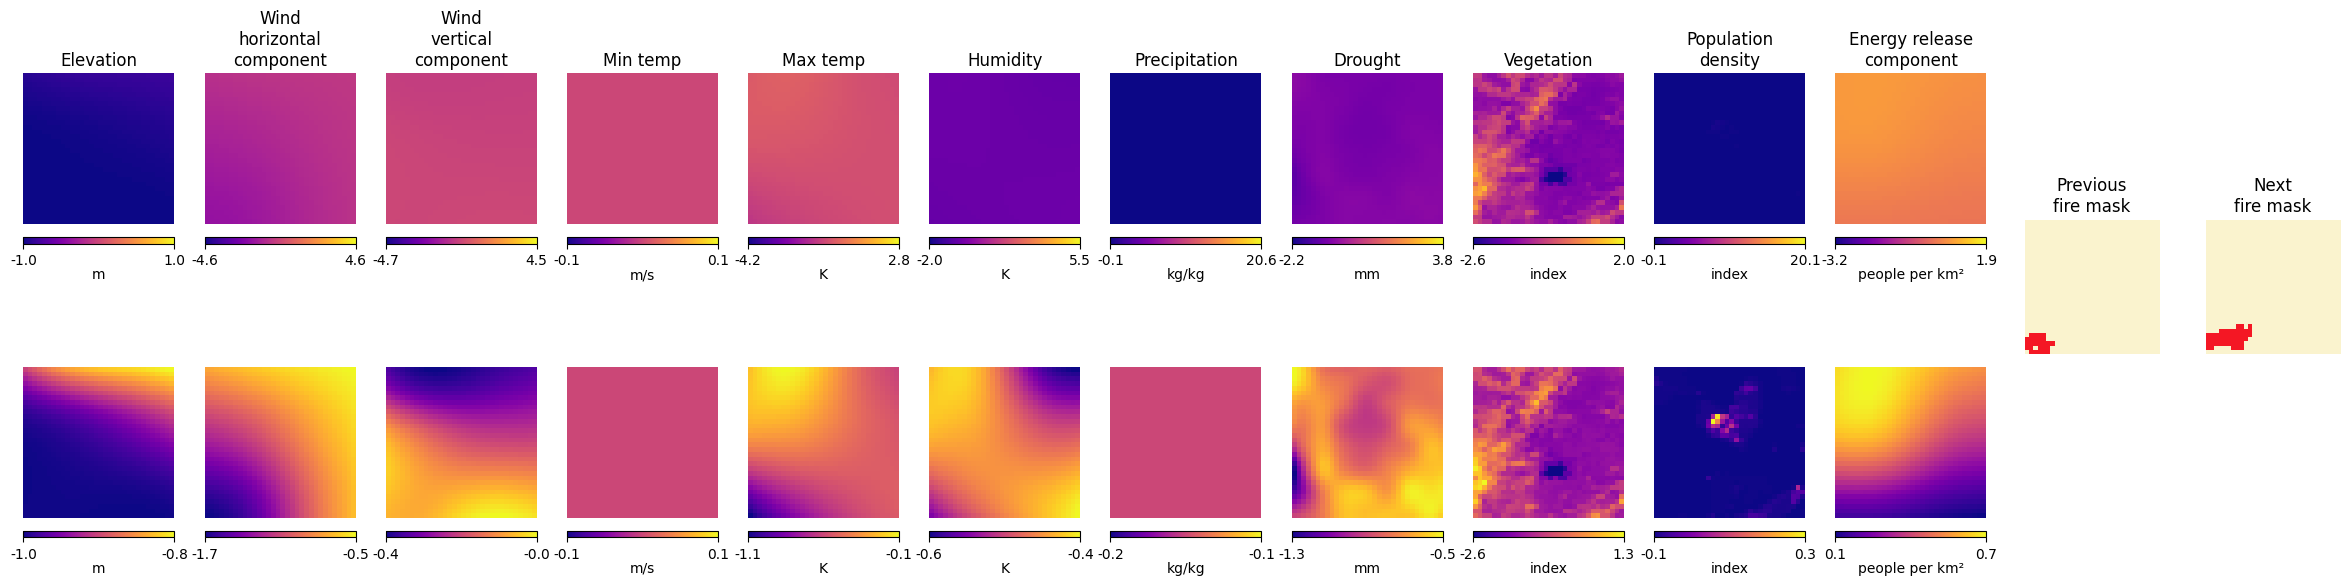

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors, gridspec, ticker


def plot_fire(features, label, n_features=12):
    fig = plt.figure(figsize=(30, 6.5))
    gs = gridspec.GridSpec(5, n_features + 1, height_ratios=[10, 0.3, 6, 10, 0.3], hspace=-0.2) #hspace controls height_ratios + hspace between plot and cbar
    CMAP = colors.ListedColormap(["#FAF3CE", '#F41724'])
    BOUNDS = [0.001, 1]
    NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)
    for j in range(n_features + 1):
        if j < n_features - 1:
            ax = fig.add_subplot(gs[0, j])
            im = ax.imshow(features[:, :, j], cmap='plasma', vmin=vmins[j], vmax=vmaxs[j])

            cbar_ax = fig.add_subplot(gs[1, j])
            cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
            cbar.set_ticks([im.norm.vmin, im.norm.vmax])
            cbar.set_ticklabels(['{:.1f}'.format(im.norm.vmin), '{:.1f}'.format(im.norm.vmax)])
            cbar.set_label(UNITS[j], labelpad=0, y=-2)

            ax2 = fig.add_subplot(gs[3, j])
            im2 = ax2.imshow(features[:, :, j], cmap='plasma')
            cbar_ax = fig.add_subplot(gs[4, j])
            cbar = plt.colorbar(im2, cax=cbar_ax, orientation='horizontal')
            cbar.set_ticks([im2.norm.vmin, im2.norm.vmax])
            cbar.set_ticklabels(['{:.1f}'.format(im2.norm.vmin), '{:.1f}'.format(im2.norm.vmax)])
            cbar.set_label(UNITS[j], labelpad=0, y=-2)

        elif j == n_features - 1:
            ax = fig.add_subplot(gs[2, j])
            im = ax.imshow(features[:, :, -1], cmap=CMAP, norm=NORM)
        elif j == n_features:
            ax = fig.add_subplot(gs[2, j])
            im = ax.imshow(label[:, :, 0], cmap=CMAP, norm=NORM)
        ax.set_title(TITLES[j], fontsize=12)
        ax.axis('off')
        ax2.axis('off')
    plt.show()
plot_fire(train_features[2], train_labels[2])

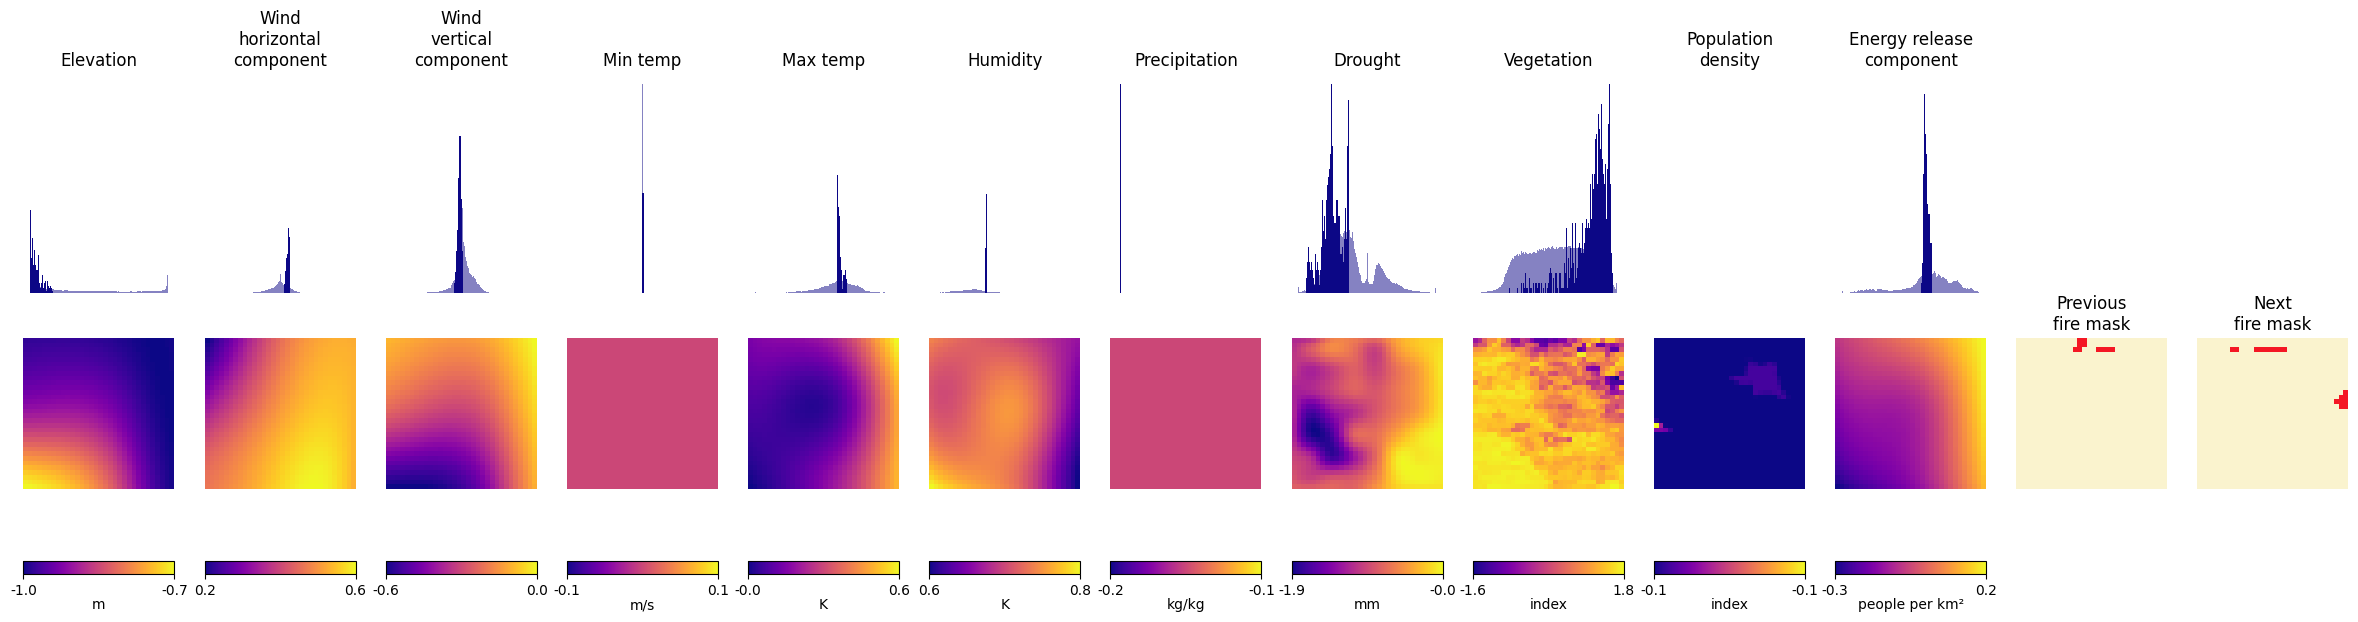

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors, gridspec, ticker


def plot_fire_hist(features, labels, idx, n_features=12):
    fig = plt.figure(figsize=(30, 6.5))
    gs = gridspec.GridSpec(4, n_features + 1, height_ratios=[5, 1, 10, 0.3], hspace=-0.4) #hspace controls height_ratios + hspace between plot and cbar
    CMAP = colors.ListedColormap(["#FAF3CE", '#F41724'])
    BOUNDS = [0.001, 1]
    NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)
    for j in range(n_features + 1):
        if j < n_features - 1:
            ax = fig.add_subplot(gs[0, j])
            ax.hist(features[:, :, :, j].flatten(), bins=250, alpha=0.5, color="#0C0786", density=True);
            ax.hist(features[idx, :, :, j].flatten(), bins=120, color="#0C0786", density=True);

            ax2 = fig.add_subplot(gs[2, j])
            im2 = ax2.imshow(features[idx, :, :, j], cmap='plasma')
            cbar_ax = fig.add_subplot(gs[3, j])
            cbar = plt.colorbar(im2, cax=cbar_ax, orientation='horizontal')
            cbar.set_ticks([im2.norm.vmin, im2.norm.vmax])
            cbar.set_ticklabels(['{:.1f}'.format(im2.norm.vmin), '{:.1f}'.format(im2.norm.vmax)])
            cbar.set_label(UNITS[j], labelpad=0, y=-2)

        elif j == n_features - 1:
            ax = fig.add_subplot(gs[2, j])
            im = ax.imshow(features[idx, :, :, -1], cmap=CMAP, norm=NORM)
        elif j == n_features:
            ax = fig.add_subplot(gs[2, j])
            im = ax.imshow(labels[idx, :, :, 0], cmap=CMAP, norm=NORM)
        ax.set_title(TITLES[j], fontsize=12)
        ax.axis('off')
        ax2.axis('off')
    plt.show()
plot_fire_hist(train_features, train_labels, 0)

## Three

In [ ]:

def normalize_train(data):
  means = {}
  stds = {}
  result = data.copy()
  for f in range(11):
    if f != 1 and f != 2: # don't normalize wind cos and sin
      feature = result[...,f]
      mean, std = np.mean(feature, axis=(0, 1, 2)), np.std(feature, axis=(0, 1, 2))
      means[f] = mean
      feature -= mean
      stds[f] = std
      if std != 0:
        feature /= std
        result[...,f] = feature
  return result, means, stds


train_features_norm, means, stds = normalize_train(train_features)

def normalize_others(data, means, stds):
  result = data.copy()
  for f in range(11):
    if f!=1 and f!=2:
      feature = result[..., f]
      mean =  means[f]
      std = stds[f]
      feature -= mean
      if std !=0:
        feature /= std
        result[..., f] = feature
  return result
val_features_norm = normalize_others(val_features, means, stds)
test_features_norm =  normalize_others(test_features, means, stds)

In [ ]:
TITLES = [
  'Elevation',
  'Wind horizontal',
  'Wind vertical',
  'Min temp',
  'Max temp',
  'Humidity',
  'Precipitation',
  'Drought',
  'Vegetation',
  'Population\ndensity',
  'Energy release\ncomponent',
  'Previous\nfire mask',
  'Next\nfire mask'
]
UNITS = ["m", "m/s", "m/s", "K", "K", "kg/kg", "mm", "index", "index", "people per km²", "index"]


## FINAL

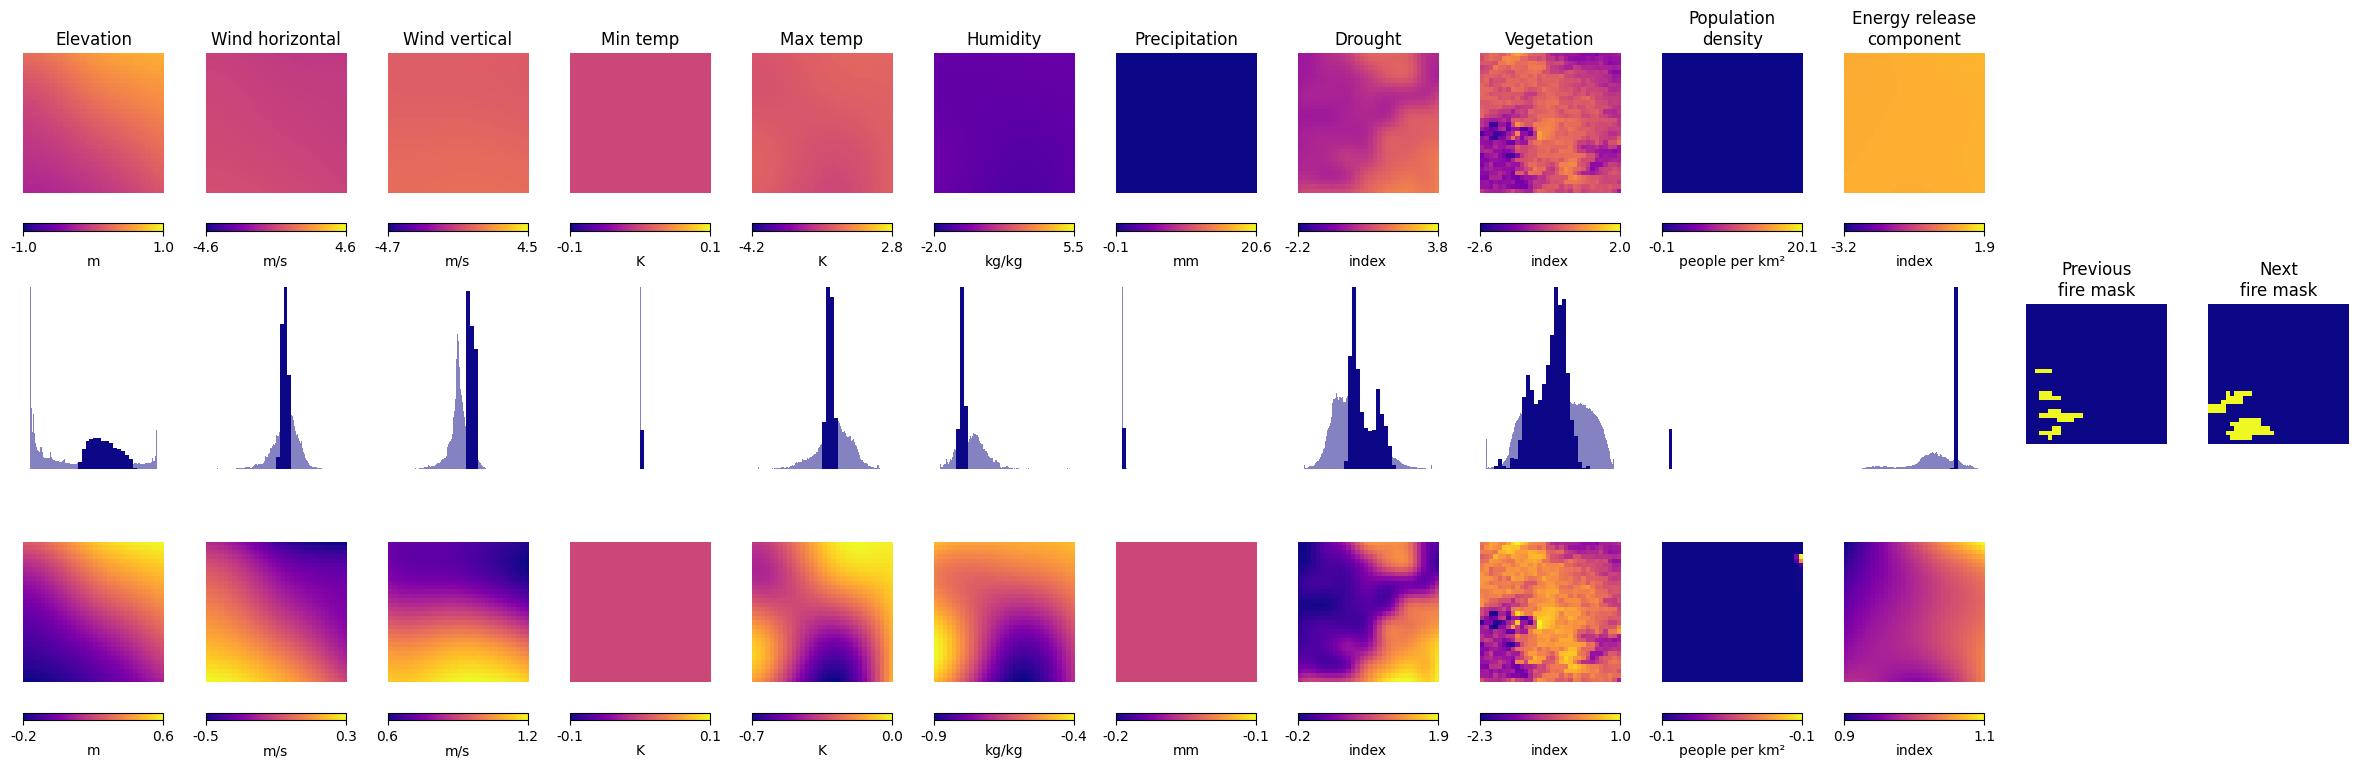

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors, gridspec, ticker


def plot_trifire(features, labels, idx, n_features=12):
    qmins, qmaxs = np.percentile(features, [0.01, 99.99], axis=(0, 1, 2))
    fig = plt.figure(figsize=(30, 9))
    gs = gridspec.GridSpec(7, n_features + 1, height_ratios=[10, 0.4, 2, 10, 2, 10, 0.4], hspace=0.05, wspace=0.3) #hspace controls height_ratios + hspace between plot and cbar
    plasma_colormap = plt.cm.plasma


    first_color = plasma_colormap(0.0)
    last_color = plasma_colormap(1.0)
    CMAP = colors.ListedColormap([first_color, last_color]) # ["#FAF3CE", '#F41724'])
    BOUNDS = [0.001, 1]
    NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)
    for j in range(n_features + 1):
        if j < n_features - 1:
            ax = fig.add_subplot(gs[0, j])
            im = ax.imshow(features[idx, :, :, j], cmap='plasma', vmin=vmins[j], vmax=vmaxs[j])

            cbar_ax = fig.add_subplot(gs[1, j])
            cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
            cbar.set_ticks([im.norm.vmin, im.norm.vmax])
            cbar.set_ticklabels(['{:.1f}'.format(im.norm.vmin), '{:.1f}'.format(im.norm.vmax)])
            cbar.set_label(UNITS[j], labelpad=0, y=-2)

            ax3 = fig.add_subplot(gs[3, j])

            hist_range = (qmins[j], qmaxs[j])
            ax3.hist(features[:, :, :, j].flatten(), range=hist_range, bins=150, alpha=0.5, color="#0C0786", density=True);
            ax3.hist(features[idx, :, :, j].flatten(), range=hist_range, bins=32, color="#0C0786", density=True);

            ax2 = fig.add_subplot(gs[5, j])
            im2 = ax2.imshow(features[idx, :, :, j], cmap='plasma')
            cbar_ax = fig.add_subplot(gs[6, j])
            cbar = plt.colorbar(im2, cax=cbar_ax, orientation='horizontal')
            cbar.set_ticks([im2.norm.vmin, im2.norm.vmax])
            cbar.set_ticklabels(['{:.1f}'.format(im2.norm.vmin), '{:.1f}'.format(im2.norm.vmax)])
            cbar.set_label(UNITS[j], labelpad=0, y=-2)

        elif j == n_features - 1:
            ax = fig.add_subplot(gs[3, j])
            im = ax.imshow(features[idx, :, :, -1], cmap=CMAP, norm=NORM)
        elif j == n_features:
            ax = fig.add_subplot(gs[3, j])
            im = ax.imshow(labels[idx, :, :, 0], cmap=CMAP, norm=NORM)
        ax.set_title(TITLES[j], fontsize=12)
        ax.axis('off')
        ax3.axis('off')
        ax2.axis('off')
    plt.show()
plot_trifire(train_features, train_labels, 3)

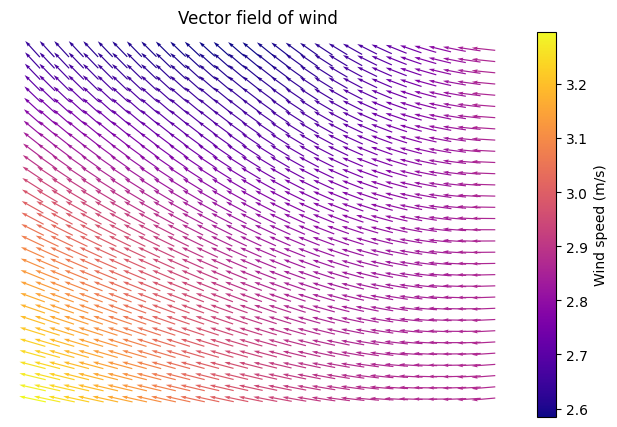

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


cos_dir = train_features[0, :, :, 1]
sin_dir = train_features[0, :, :, 2]


x, y = np.meshgrid(np.arange(32), np.arange(32))

norm = Normalize(vmin=velocity.min(), vmax=velocity.max())

plt.figure(figsize=(8, 5))
quiver = plt.quiver(x, y, u, v, velocity, cmap='plasma', pivot="mid", norm=norm, scale=60)
plt.colorbar(quiver, label='Wind speed (m/s)')
plt.title('Vector field of wind')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("off")
plt.show()

## Utils

In [ ]:
def compute_wrong_pixels_per_fire(true, pred):
  # compute nubmer pixel different for the first dimension (usually a fire)
  return torch.sum(np.abs(true - pred), axis=(1, 2, 3))

In [ ]:
import numpy as np

def normalize_data(data, means=None, stds=None):

    excluded_indices = {1, 2}  # indices to exclude from normalization
    result = data.copy()
    is_training = means is None or stds is None

    if is_training:
        means, stds = {}, {}

    for f in range(data.shape[-1]):
        if f in excluded_indices:
            continue

        feature = result[..., f]
        if is_training:
            means[f] = np.mean(feature)
            stds[f] = np.std(feature)

        mean = means[f]
        std = stds[f]

        feature -= mean
        if std != 0:
            feature /= std

        result[..., f] = feature

    if is_training:
        return result, means, stds
    return result

# Example usage:
train_features, means, stds = normalize_data(train_features)
val_features = normalize_data(val_features, means, stds)
test_features = normalize_data(test_features, means, stds)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
train_features_reshaped = train_features.reshape(-1, 13)
train_labels_reshaped = train_labels.ravel()
model.fit(train_features_reshaped, train_labels_reshaped)

LogisticRegression()

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(true_labels, predictions):
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='#FAA039', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='#230590', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

In [ ]:
model_normed = LogisticRegression()
train_features_reshaped = train_features_norm.reshape(-1, 13)
train_labels_reshaped = train_labels.ravel()
model_normed.fit(train_features_reshaped, train_labels_reshaped)

LogisticRegression()

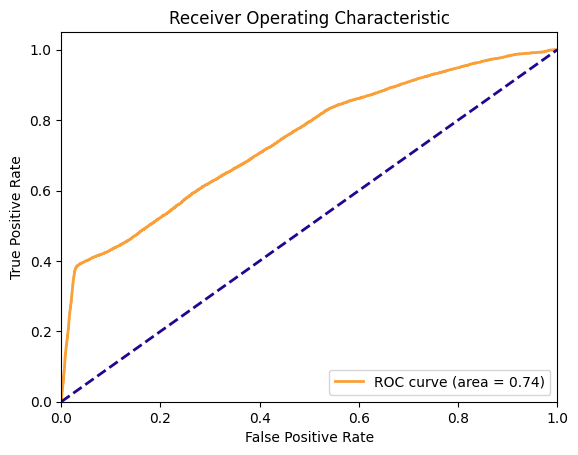

In [ ]:
X_test = test_features_norm.reshape(-1, 13)
y_test = test_labels.reshape(-1, 1)
preds_val = model_normed.predict_proba(X_test)[:, 1]

roc_auc = plot_roc_curve(y_test, preds_val)

In [ ]:
TITLES = [
  'Elevation',
  'Wind\n direction cos',
  'Wind\n direction sin',
  'Wind\nvelocity',
  'Min temp',
  'Max temp',
  'Humidity',
  'Precipitation',
  'Drought',
  'Vegetation',
  'Population\ndensity',
  'Energy release\ncomponent',
  'Previous\nfire mask',
  'Next\nfire mask'
]
variables = [
  'Elevation',
  'Wind direction cos',
  'Wind direction sin',
  'Wind velocity',
  'Min temp',
  'Max temp',
  'Humidity',
  'Precipitation',
  'Drought',
  'Vegetation',
  'Population density',
  'Energy release component',
  'Previous fire mask'
]

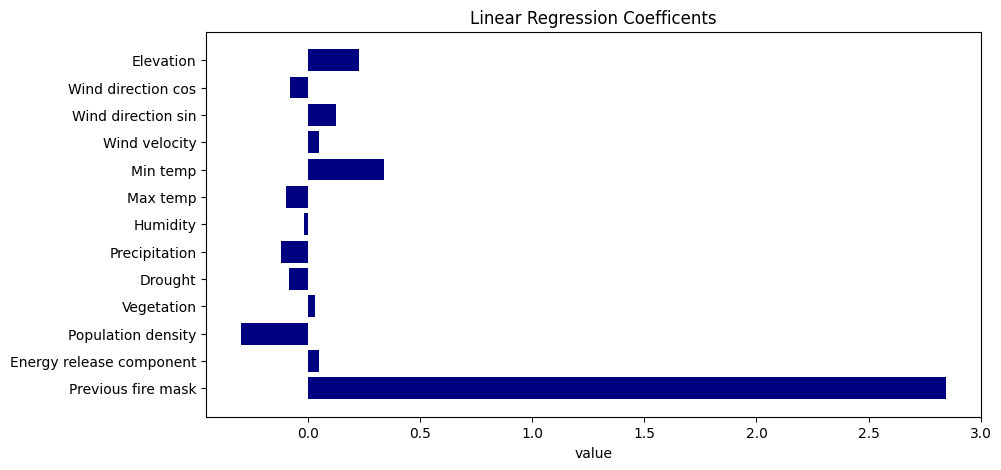

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(variables[::-1], model_normed.coef_.flatten()[::-1], color='navy')
plt.xlabel('value')
plt.title('Linear Regression Coefficents')
plt.grid(False)
plt.show()

In [ ]:
import numpy as np

def get_pixel_neighbors(array):
    n, h, w, c = array.shape
    # add padding to images with edge values
    padded_array = np.pad(array, pad_width=((0, 0), (1, 1), (1, 1), (0, 0)), mode='edge')
    all_neighbors = []
    for i in range(1, h + 1):
        for j in range(1, w + 1):
            neighbor_block = padded_array[:, i-1:i+2, j-1:j+2, :].reshape(n, -1)
            all_neighbors.append(neighbor_block)

    result = np.vstack(all_neighbors)
    return result

example_array = np.random.rand(2, 32, 32, 13)  # shape (2, 32, 32, 13)
output = get_pixel_neighbors(train_features_norm)
print("Output shape:", output.shape)


Output shape: (4404224, 117)


In [ ]:
output.shape

(4404224, 117)

In [ ]:
all_features = []
all_labels = []

for inputs, labels in zip(train_features_norm, train_labels):
    padded_inputs = tf.pad(inputs, [[0, 0], [1, 1], [1, 1], [0, 0]], mode='CONSTANT')
    neighborhoods = tf.image.extract_patches(
        images=padded_inputs,
        sizes=[1, 3, 3, 1],
        strides=[1, 1, 1, 1],
        rates=[1, 1, 1, 1],
        padding='VALID'
    )
    features = tf.reshape(neighborhoods, [-1, 3*3*c])
    labels = tf.reshape(labels, [-1])

    all_features.append(features.numpy())
    all_labels.append(labels.numpy())

all_features = np.concatenate(all_features, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

return all_features, all_labels


NameError: name 'tf' is not defined

In [ ]:
model_normed_neigh = LogisticRegression()
train_features_reshaped = output.reshape(-1, 117)
train_labels_reshaped = train_labels.ravel()
model_normed_neigh.fit(train_features_reshaped, train_labels_reshaped)

In [ ]:
test_features_neigh = get_pixel_neighbors(test_features_norm)

In [ ]:
X_test = test_features_neigh.reshape(-1, 117)
y_test = test_labels.reshape(-1, 1)
preds_val = model_normed_neigh.predict_proba(X_test)[:, 1]

roc_auc = plot_roc_curve(y_test, preds_val)

##Dummy model

In [ ]:
def dummy_model(features):
  return features[:,:,:, 12:]
y_pred_train = dummy_model(train_features)
y_pred_val = dummy_model(val_features)
y_pred_test = dummy_model(test_features)

In [ ]:

def compute_metrics(true_labels, predictions, threshold=0.5):

    binary_preds = (predictions >= threshold).astype(int)

    precision = precision_score(true_labels, binary_preds, zero_division=0)
    recall = recall_score(true_labels, binary_preds, zero_division=0)
    f1 = f1_score(true_labels, binary_preds, zero_division=0)

    return {
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }


In [ ]:
roc_auc = plot_roc_curve(y_test, y_pred_test.ravel())

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

predictions_dict  = {
    'train': {'true': train_labels, 'predictions': y_pred_train},
    'validation': {'true': val_labels, 'predictions': y_pred_val},
    'test': {'true': test_labels, 'predictions': y_pred_test}
}


for split, data in predictions_dict.items():
    true_labels = data['true'].ravel()
    predictions = data['predictions'].ravel()
    auc_score = roc_auc_score(true_labels, predictions) # metrics with proba
    metrics = compute_metrics(true_labels, predictions) # metrics given a threshold
    print(f"{split.capitalize()}: AUC={auc_score:.2f}, precision={metrics['Precision']:.2f}, recall={metrics['Recall']:.2f}, f1={metrics['F1']:.2f}")
